In [1]:
# Import Pandas and Numpy librarries
import pandas as pd
import numpy as np

# Load and read the data file
df = pd.read_csv('HR-Employee-Attrition.csv')

# Display first 5 rows to explore the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data cleaning
Let's first get the data cleaned by checking duplicates - nulls or any errors that may occur

In [2]:
# Check for Duplicates
df.duplicated().sum()

0

In [3]:
# Check for Nulls
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

As we can see, the data seems to be clean already, so now we will start exploring it to have insights and deep understanding for the data

let's start with univariate analysis - one variable

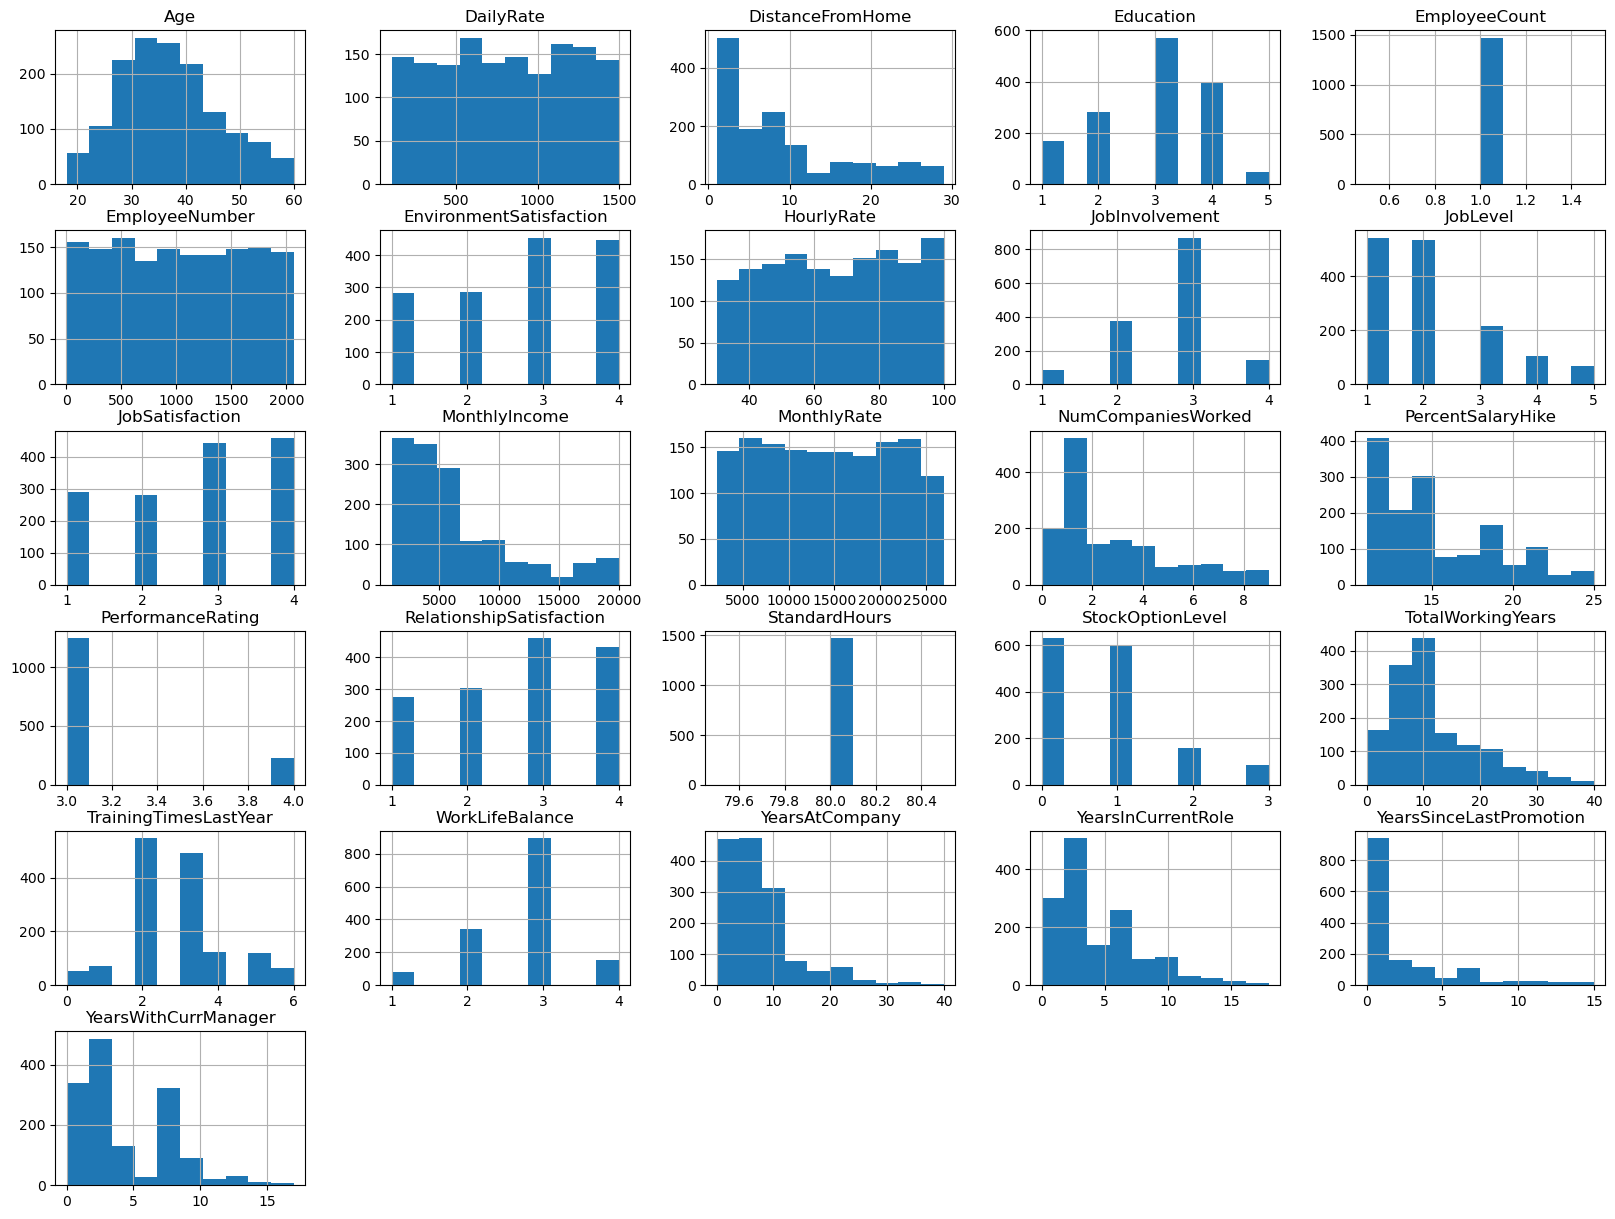

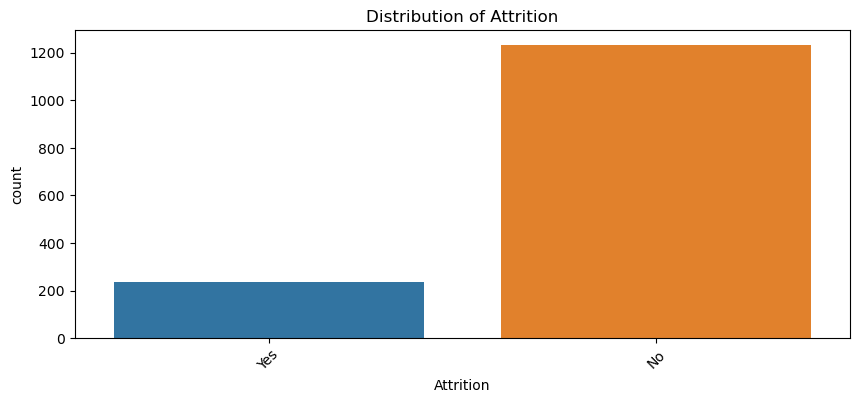

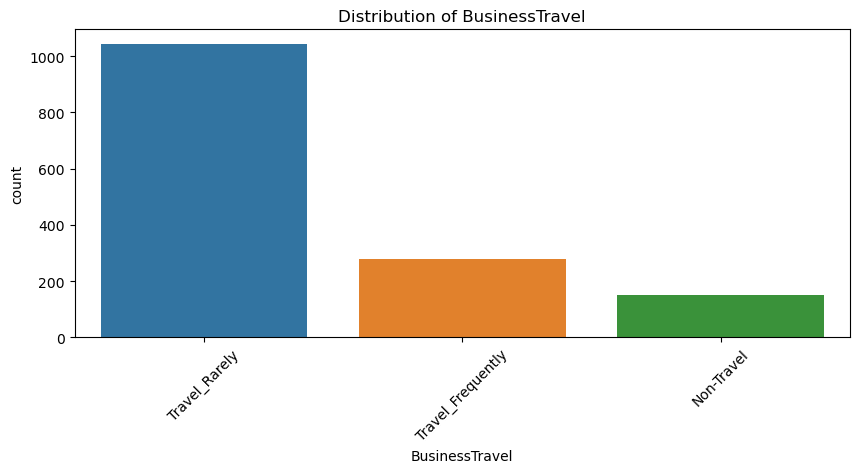

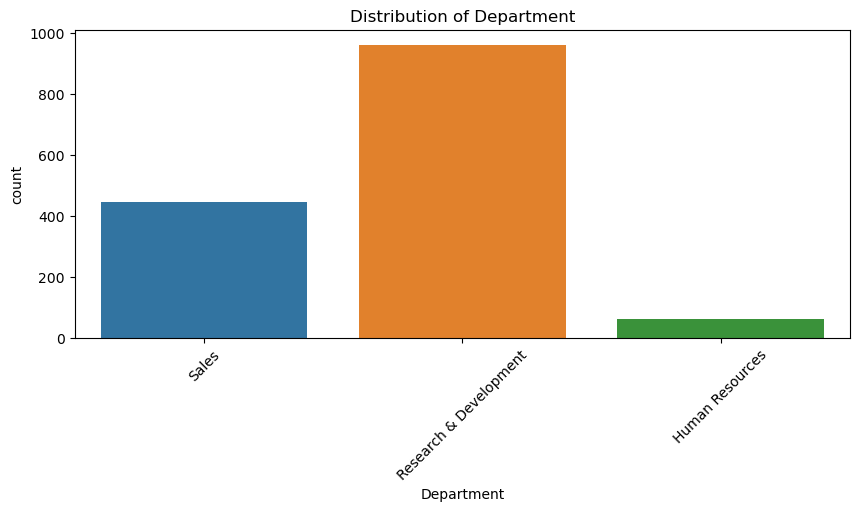

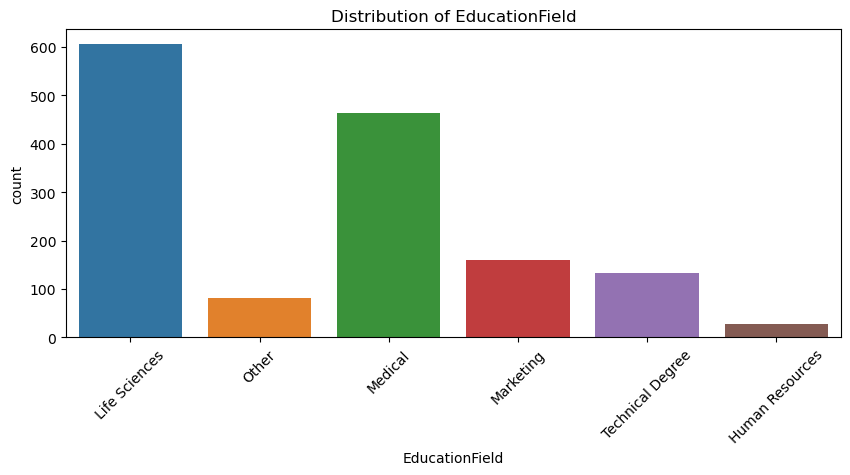

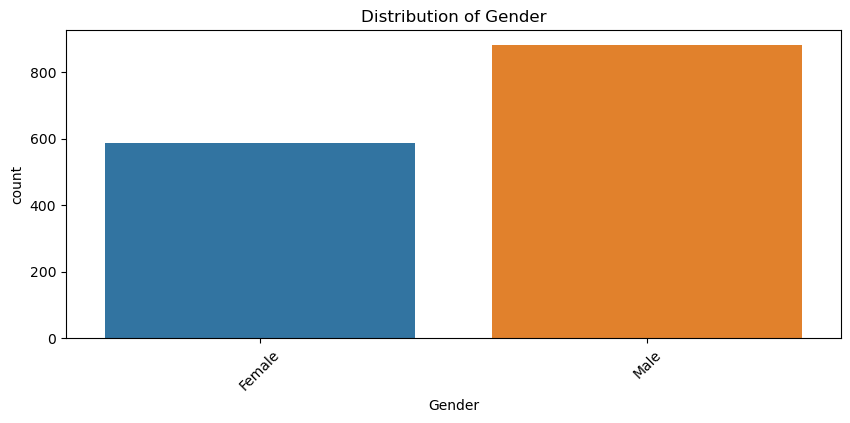

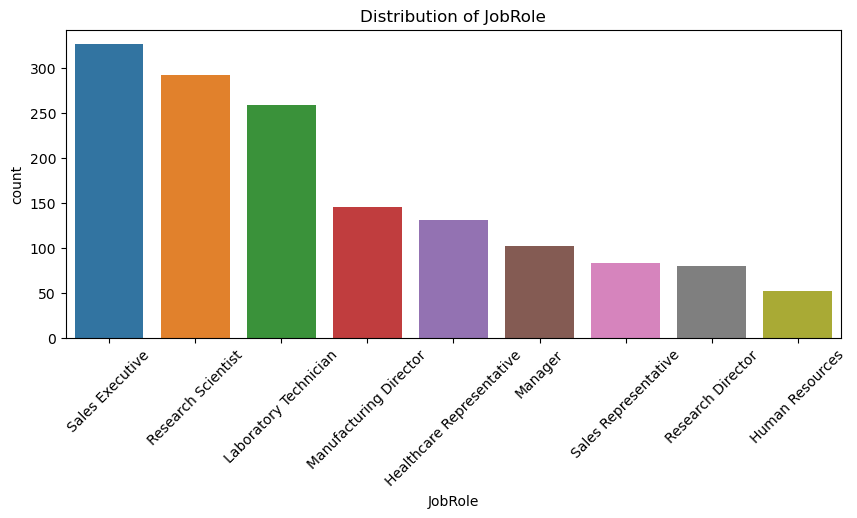

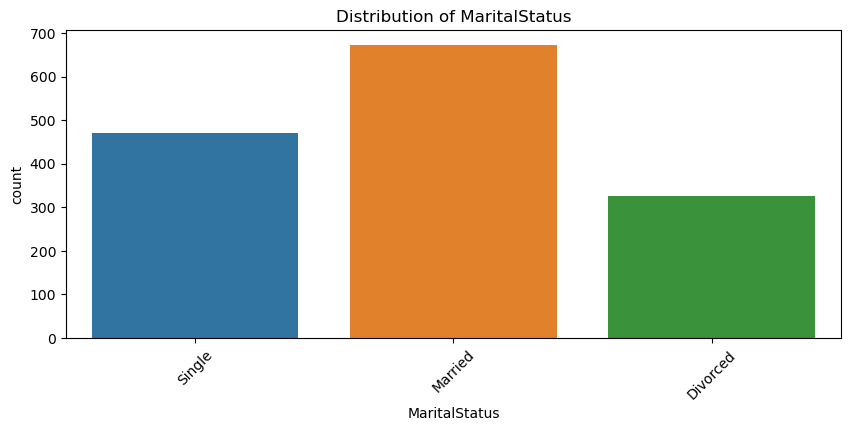

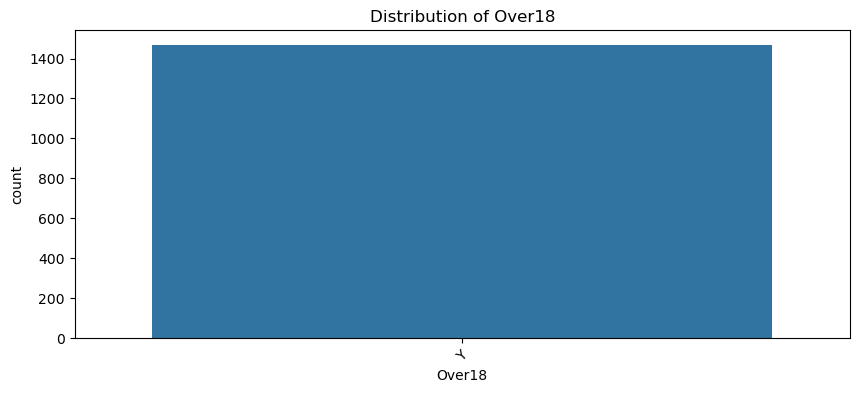

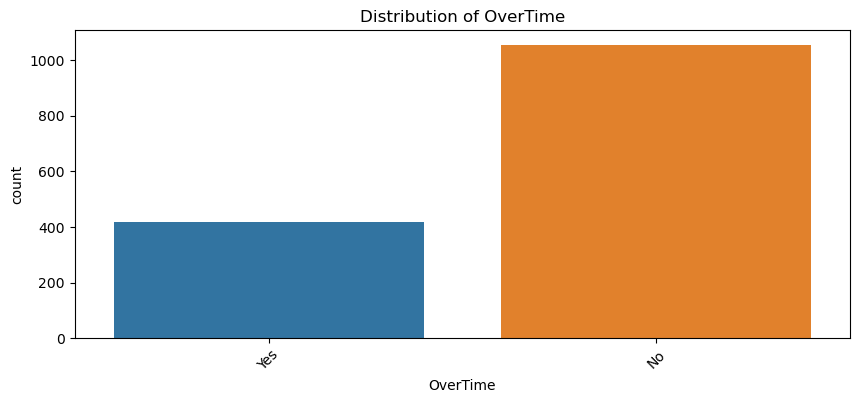

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numeric data
numeric_cols = df.select_dtypes(include=['int64']).columns
df[numeric_cols].hist(figsize=(20, 15))
plt.show()

# Count plots for categorical data
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


bi variate analysis with attrition

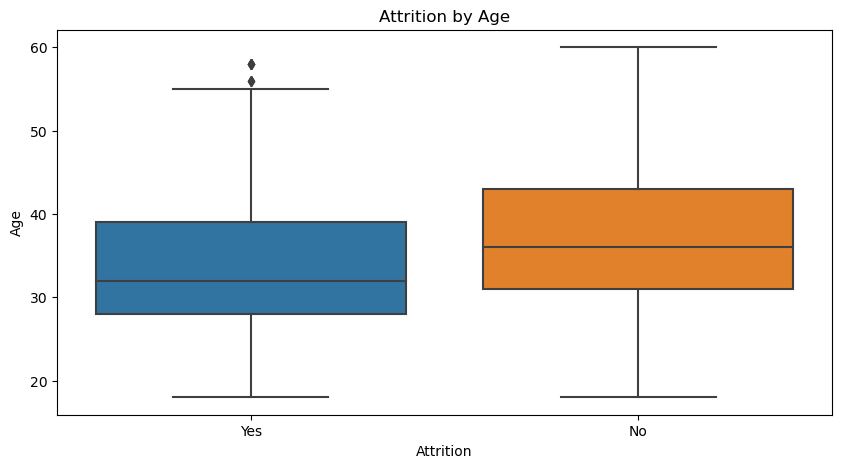

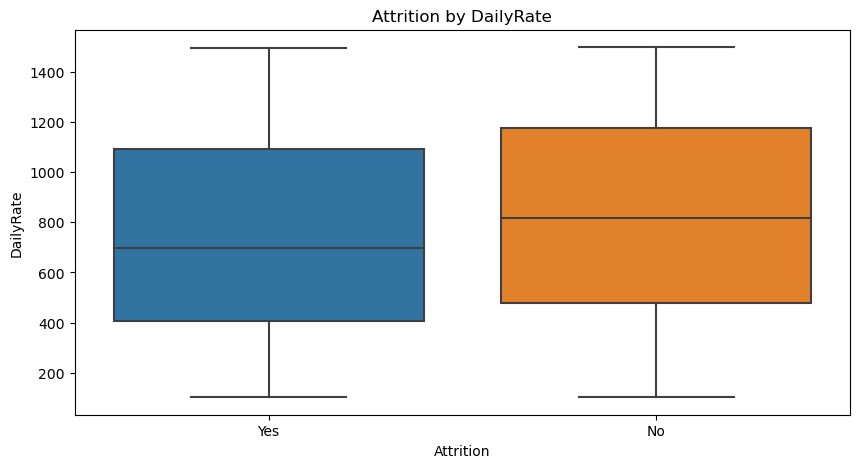

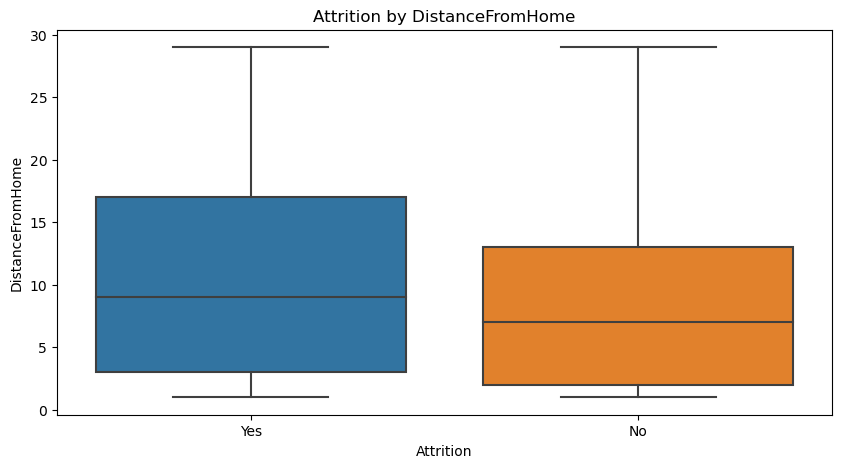

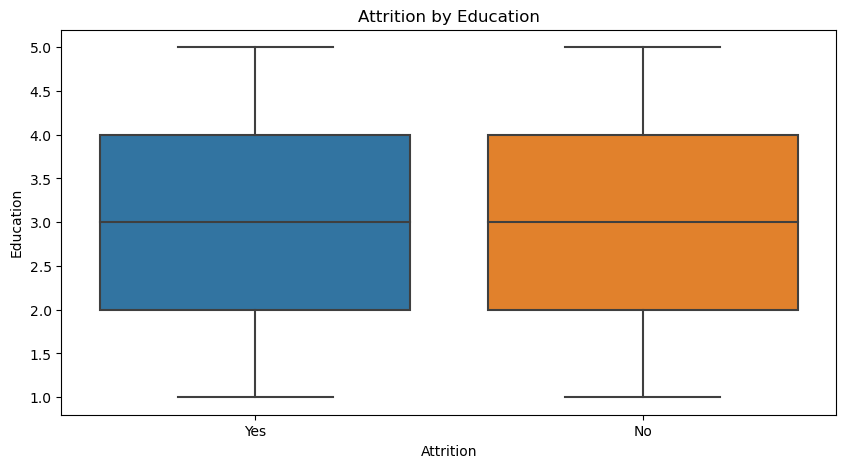

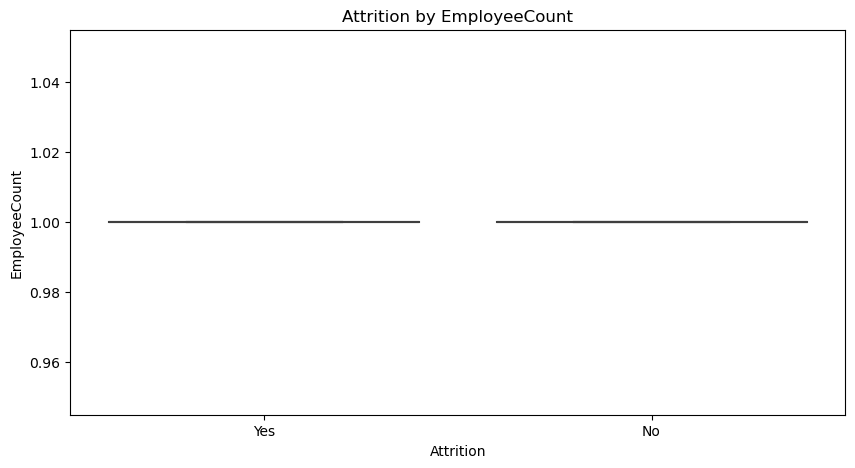

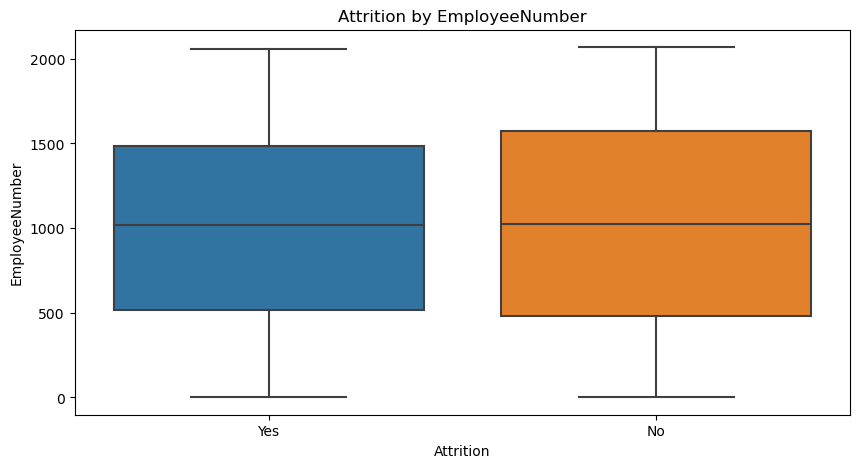

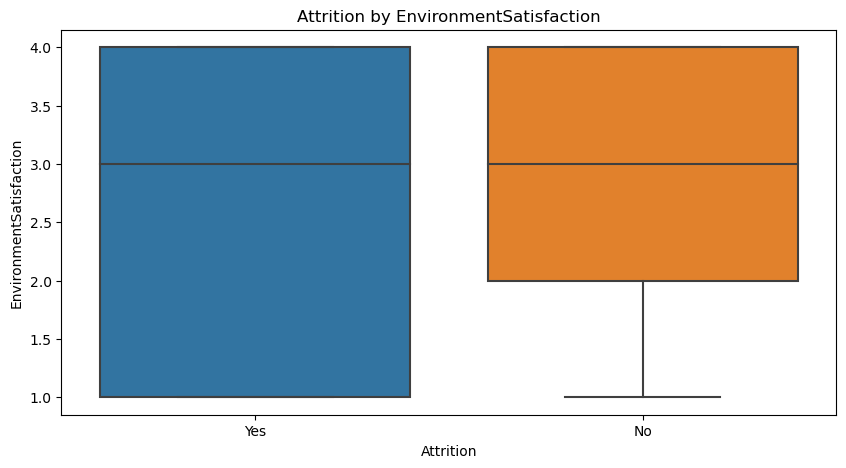

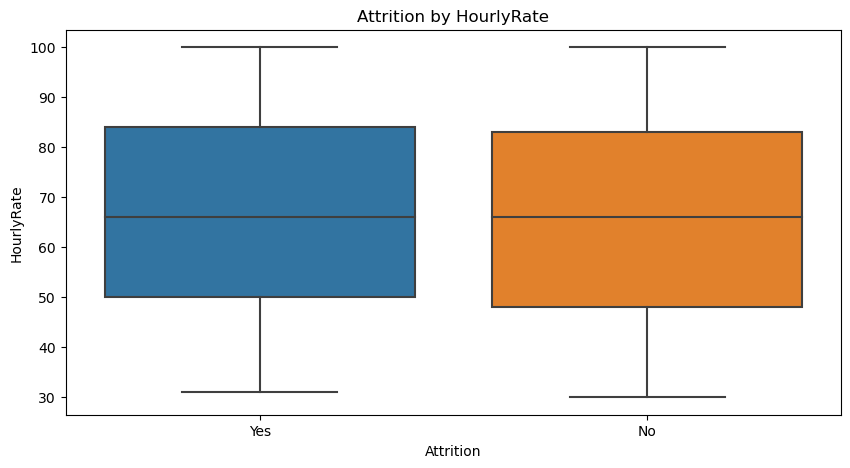

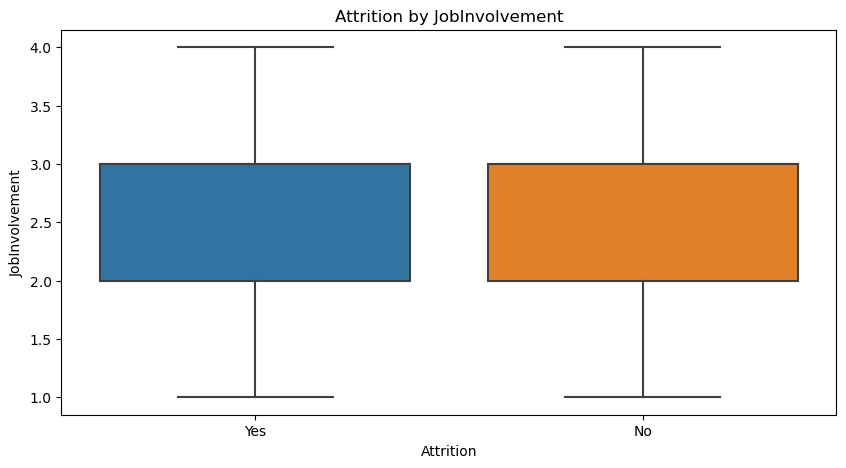

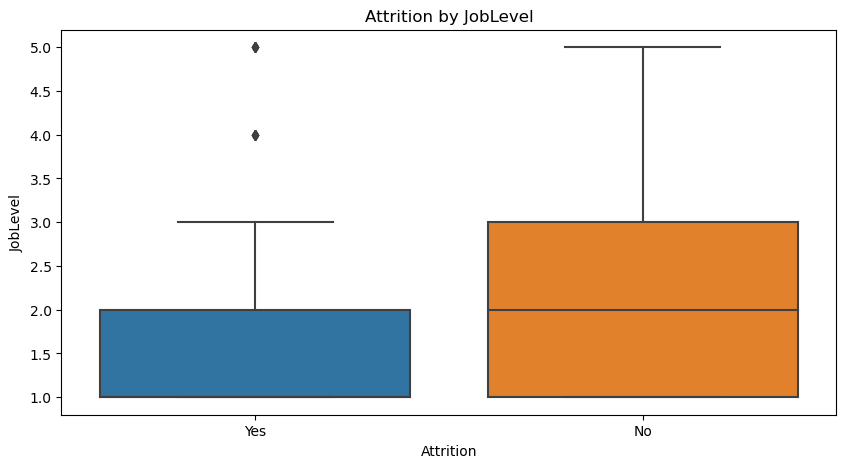

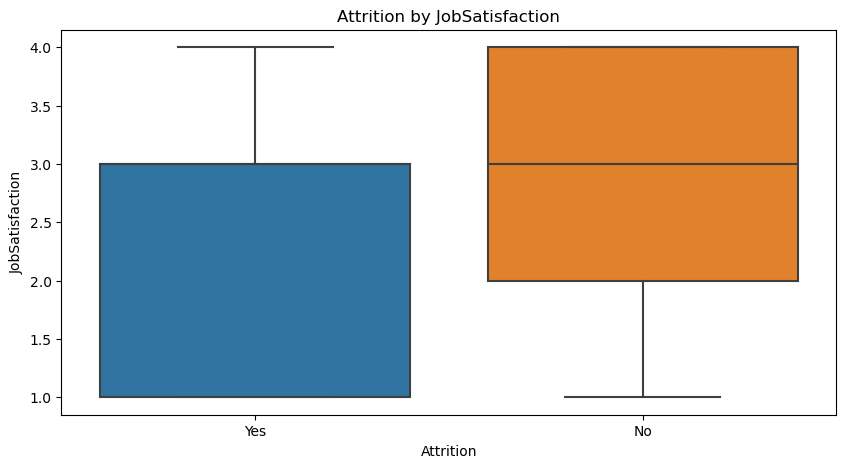

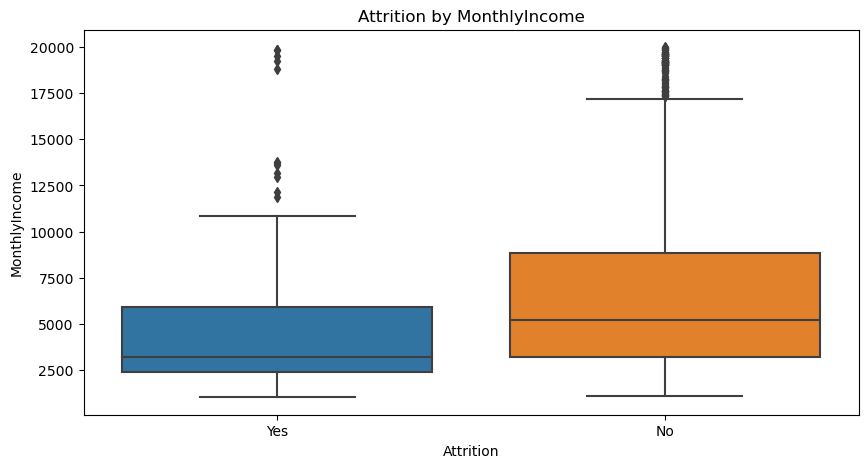

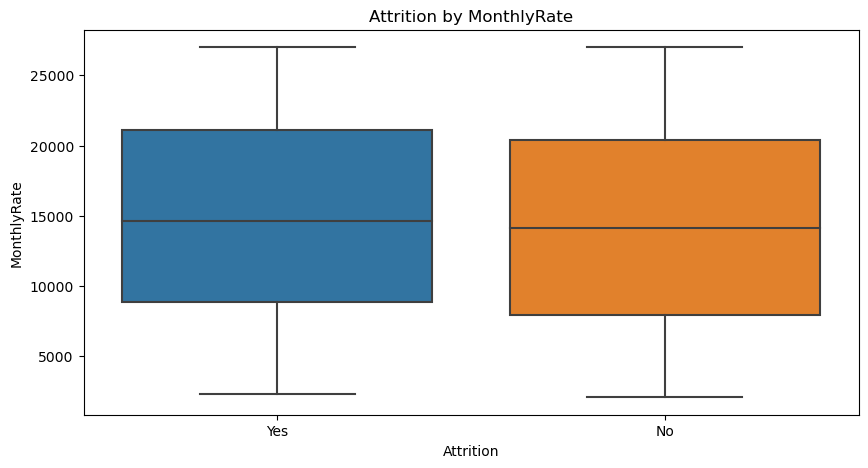

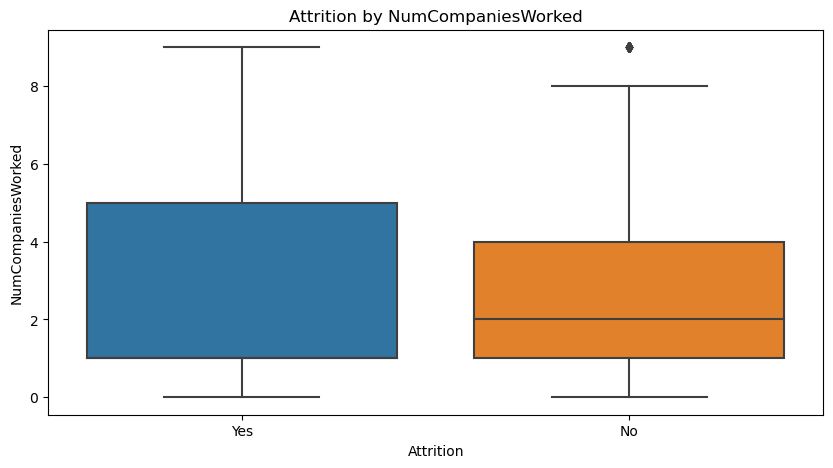

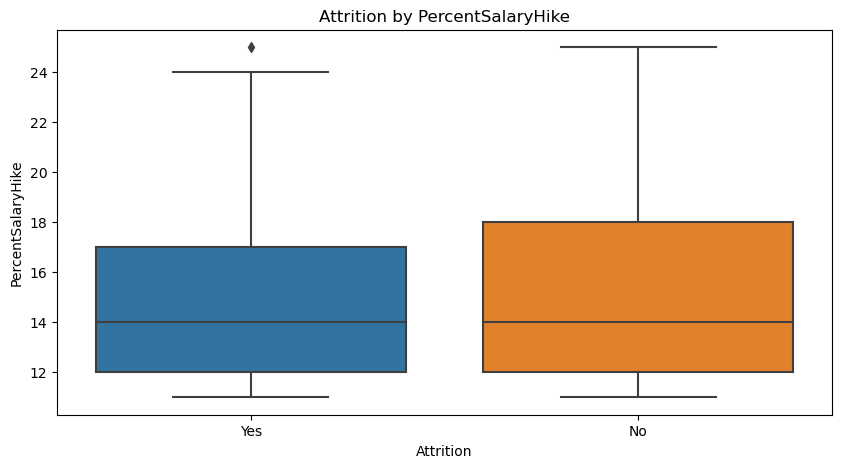

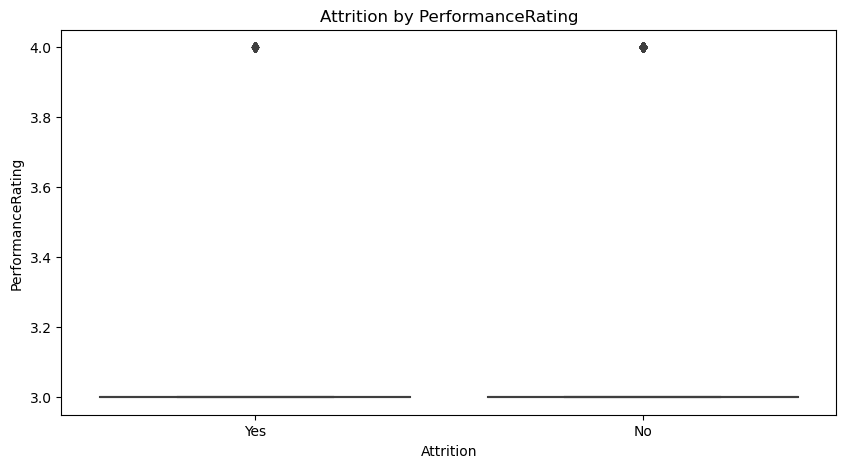

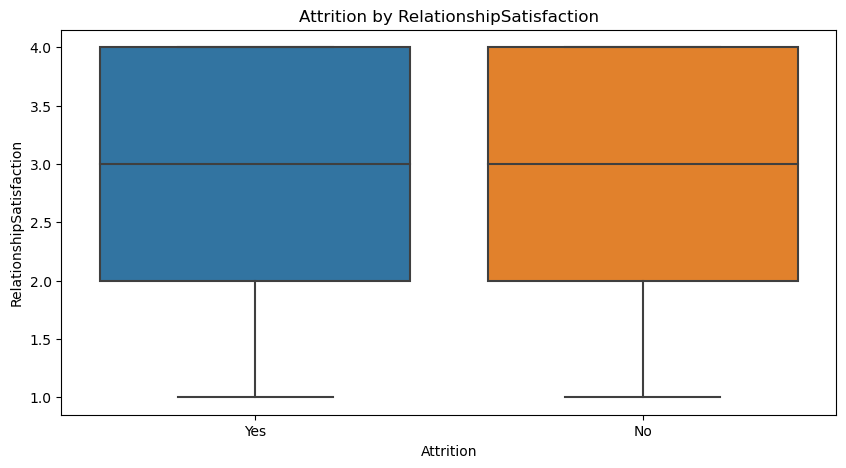

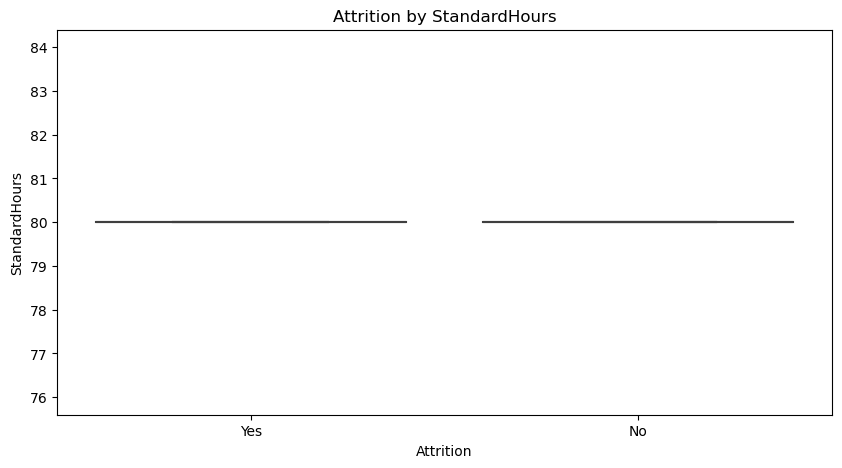

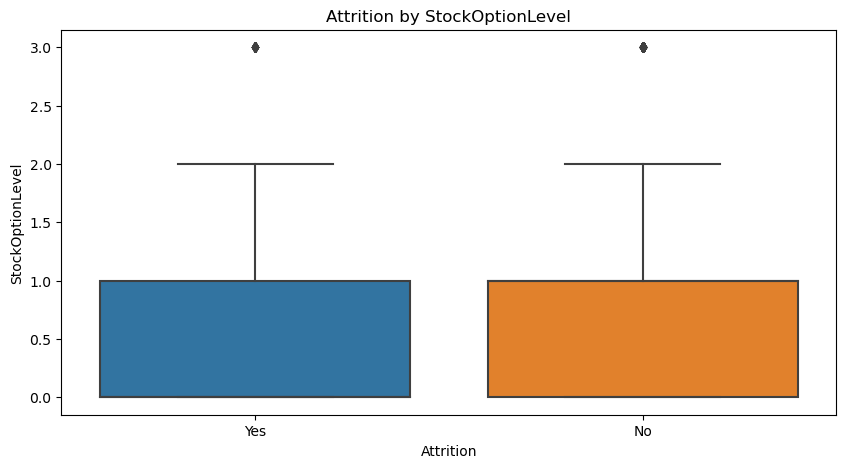

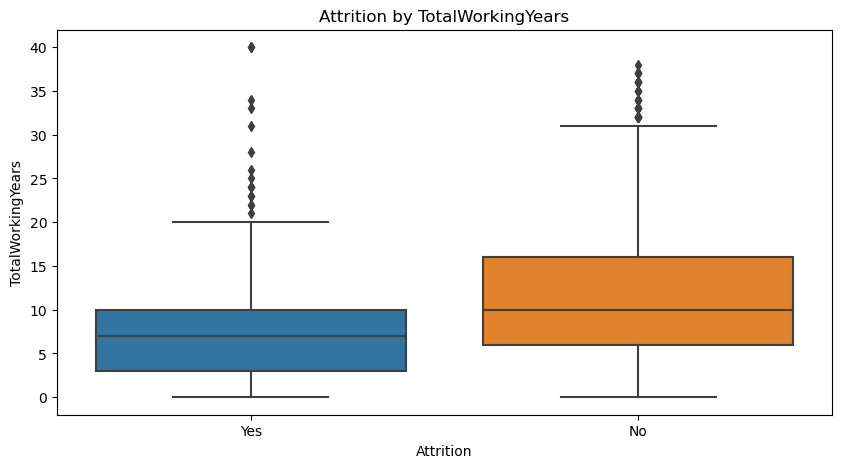

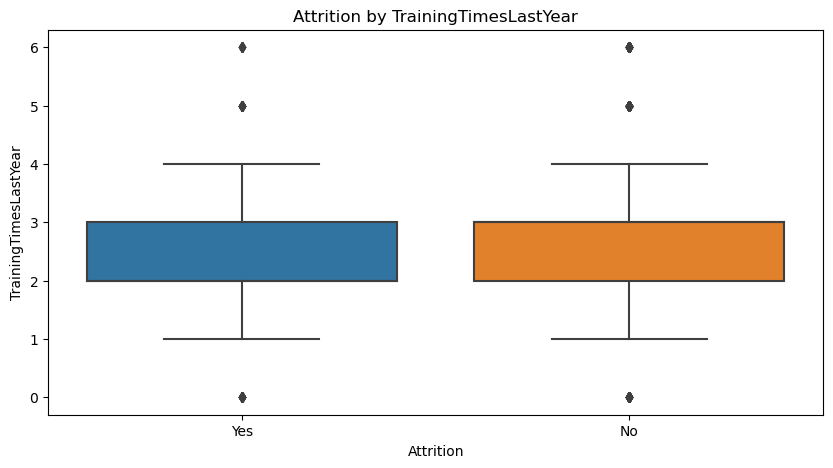

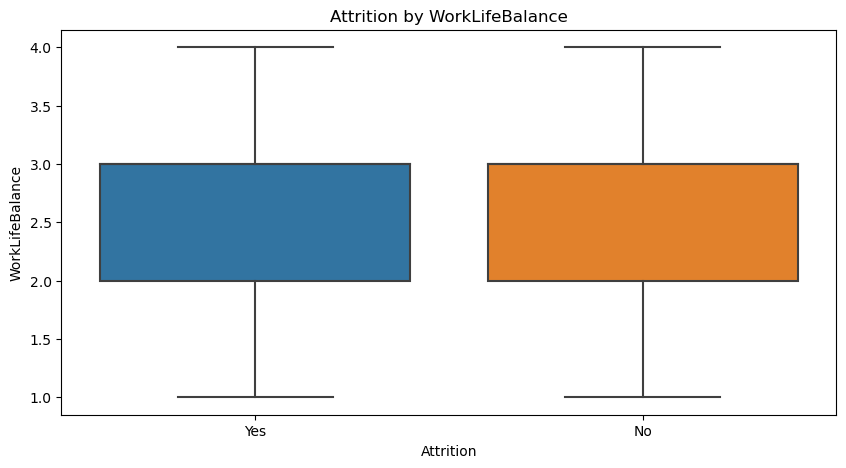

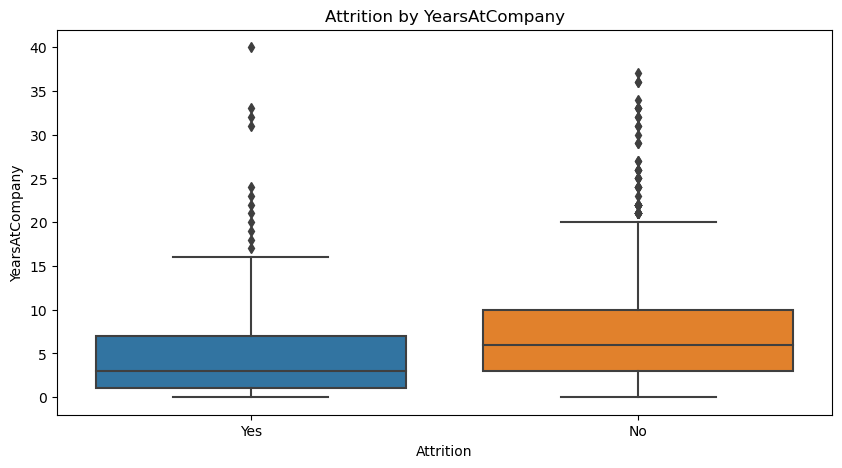

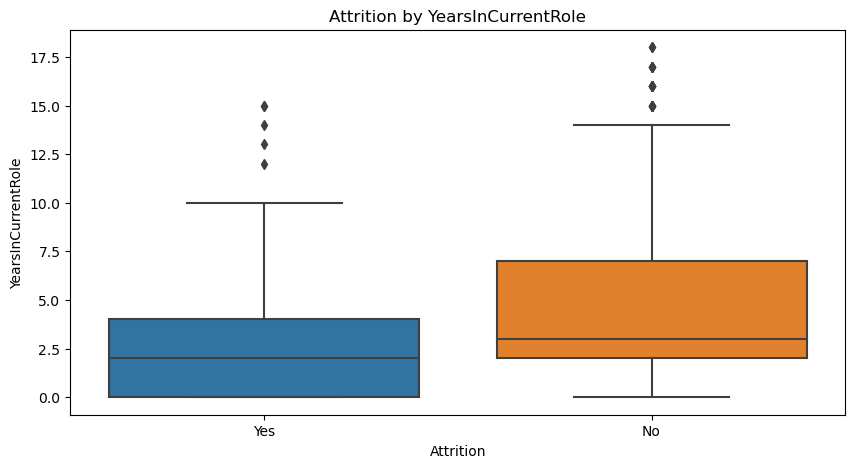

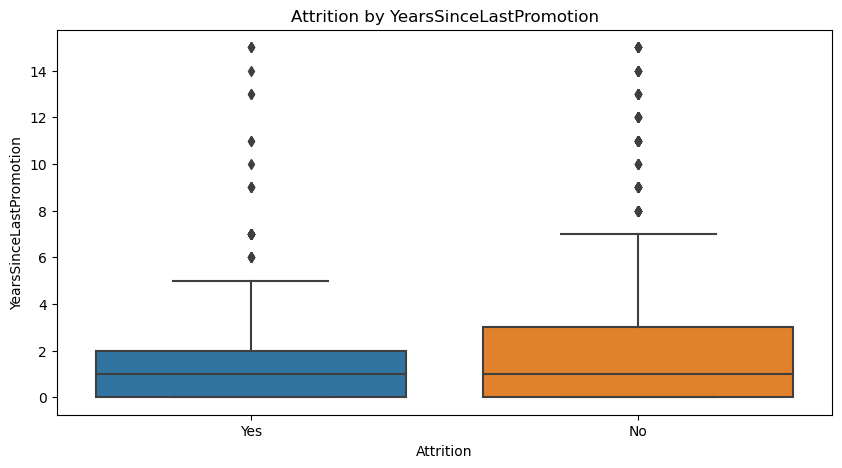

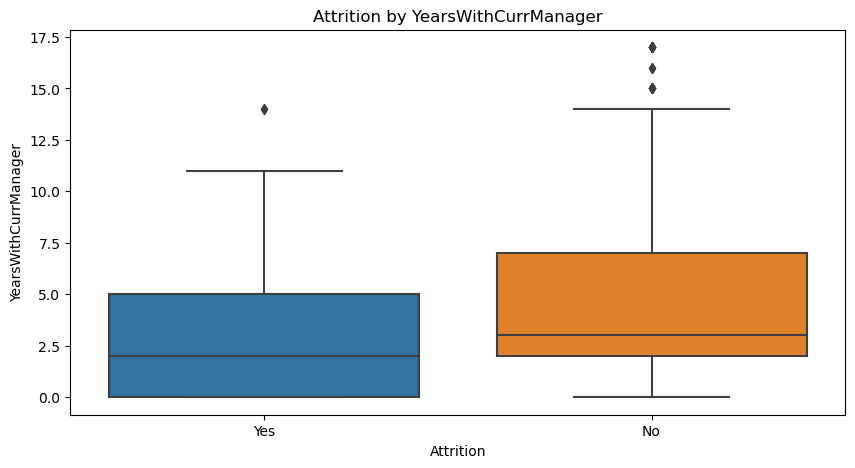

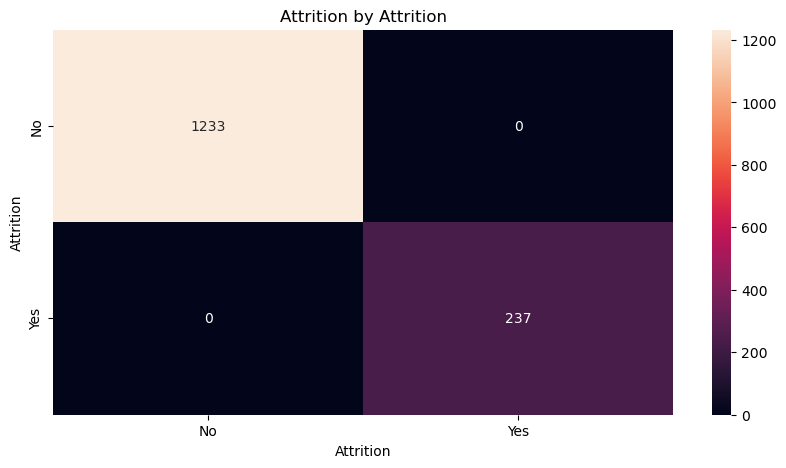

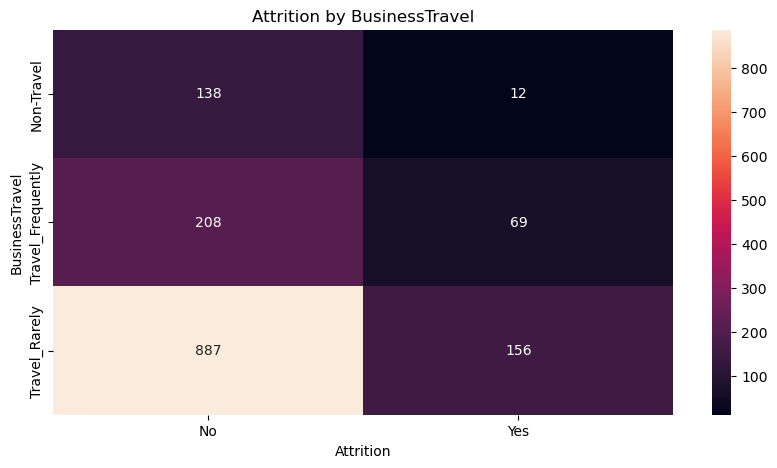

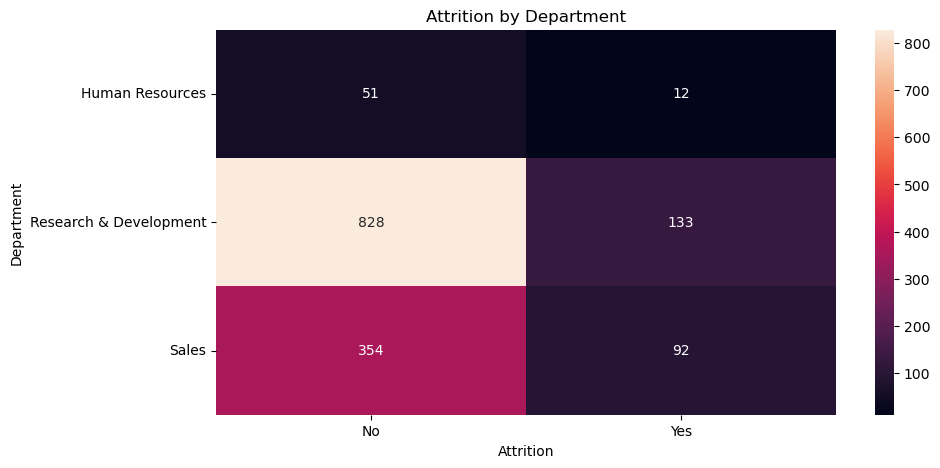

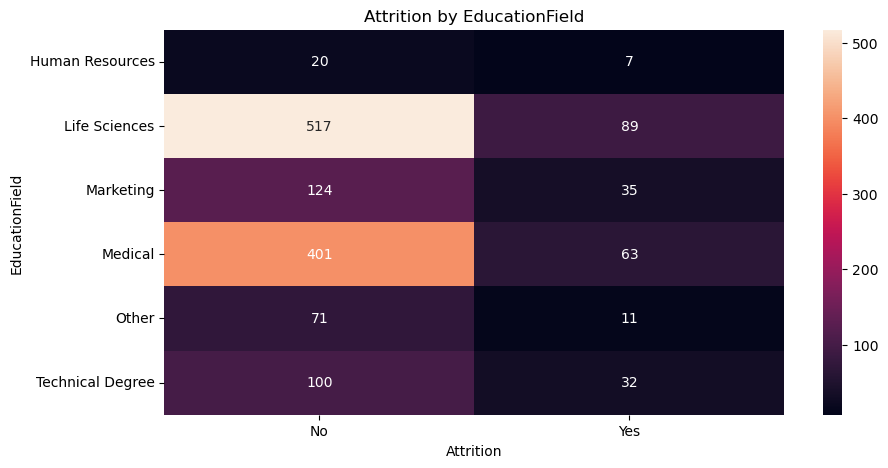

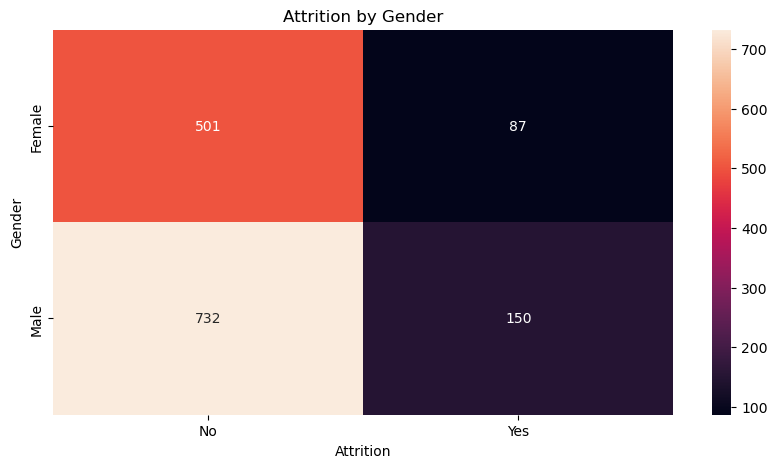

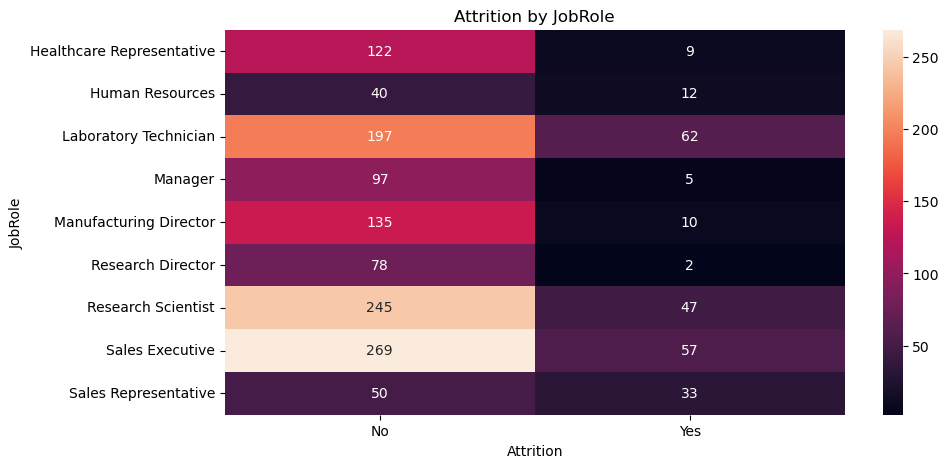

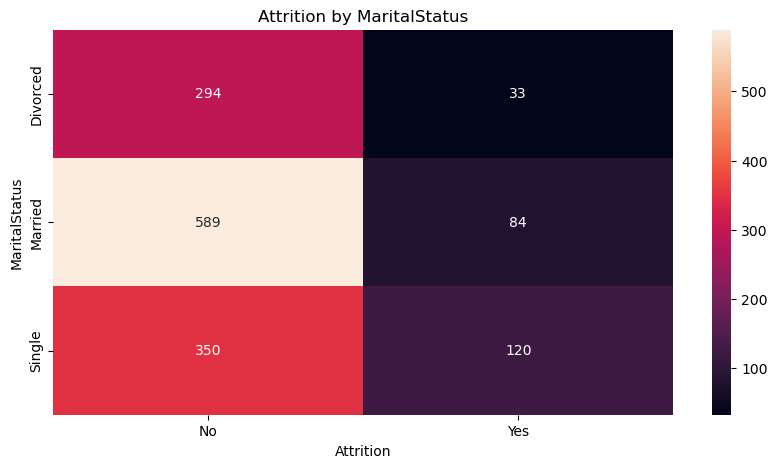

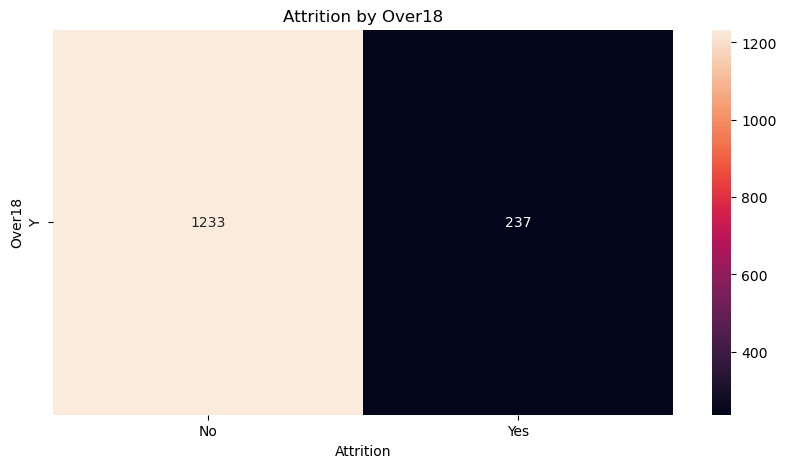

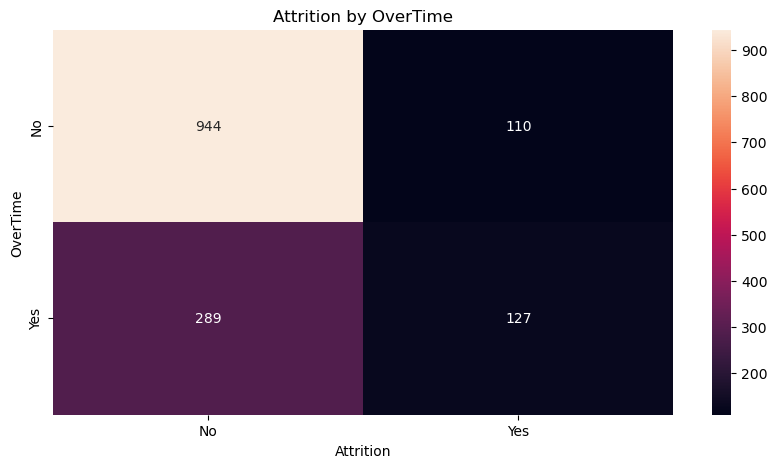

In [6]:
# Boxplots for numeric variables with Attrition
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f'Attrition by {col}')
    plt.show()

# Crosstabs for categorical variables with Attrition
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    plt.figure(figsize=(10, 5))
    sns.heatmap(contingency_table, annot=True, fmt='d')
    plt.title(f'Attrition by {col}')
    plt.show()


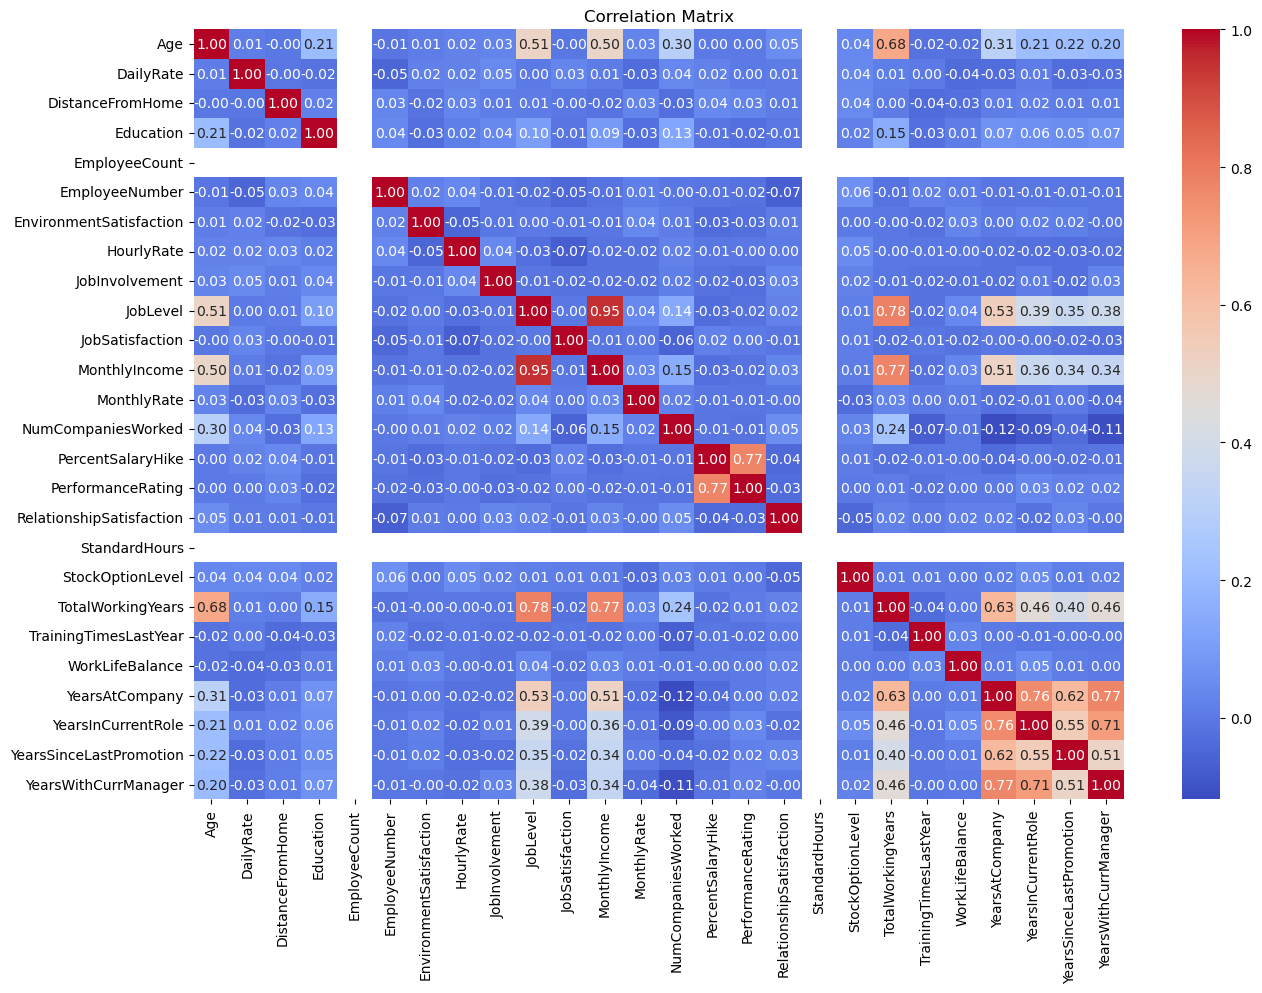

In [8]:
# Correlation matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


C:\Users\nawaf\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


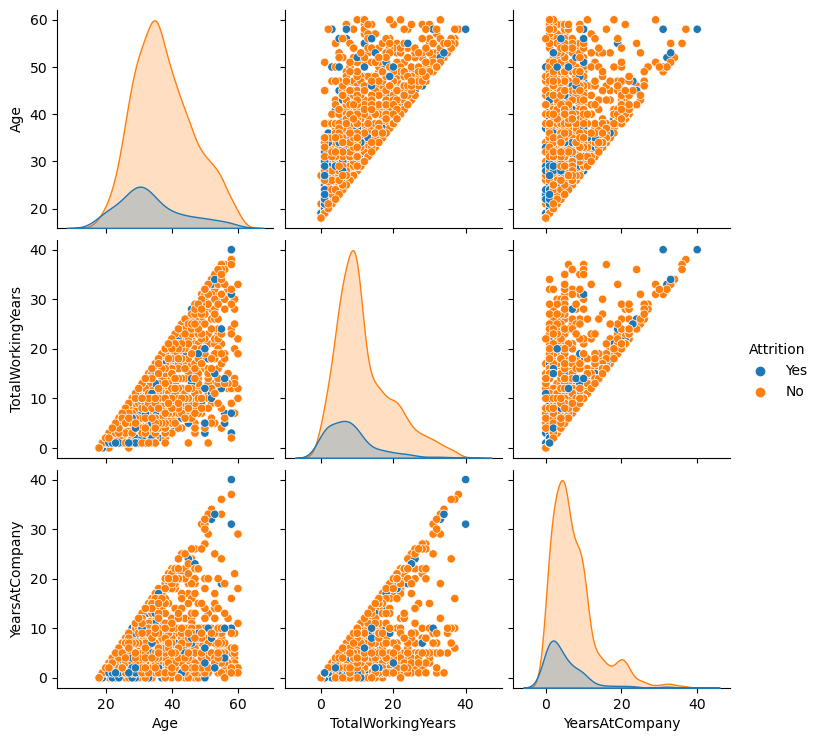

In [9]:
# Pairplot for selected features
sns.pairplot(df[['Age', 'TotalWorkingYears', 'YearsAtCompany', 'Attrition']], hue='Attrition')
plt.show()


Cool, Now we will be answering 3 critical questions through this data, to drive growth and solve business problems

# First question: How does the distance from home affects job and environment satisfaction ?
via answering this question, the stakeholders can have accurate view of the impact of Remote Work, wether to go with it or no need to go

First, let’s create some basic summaries to get a feel for the distribution and relationships.

In [32]:
# Display basic statistics for 'DistanceFromHome', 'JobSatisfaction', and EnvironmentSatisfaction
display(df[['DistanceFromHome', 'JobSatisfaction', 'EnvironmentSatisfaction']].describe())

,DistanceFromHome,JobSatisfaction,EnvironmentSatisfaction
count,1470.000000,1470.000000,1470.000000
mean,9.192517,2.728571,2.721769
std,8.106864,1.102846,1.093082
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000
50%,7.000000,3.000000,3.000000
75%,14.000000,4.000000,4.000000
max,29.000000,4.000000,4.000000


We will create scatter plots to visually inspect the relationships

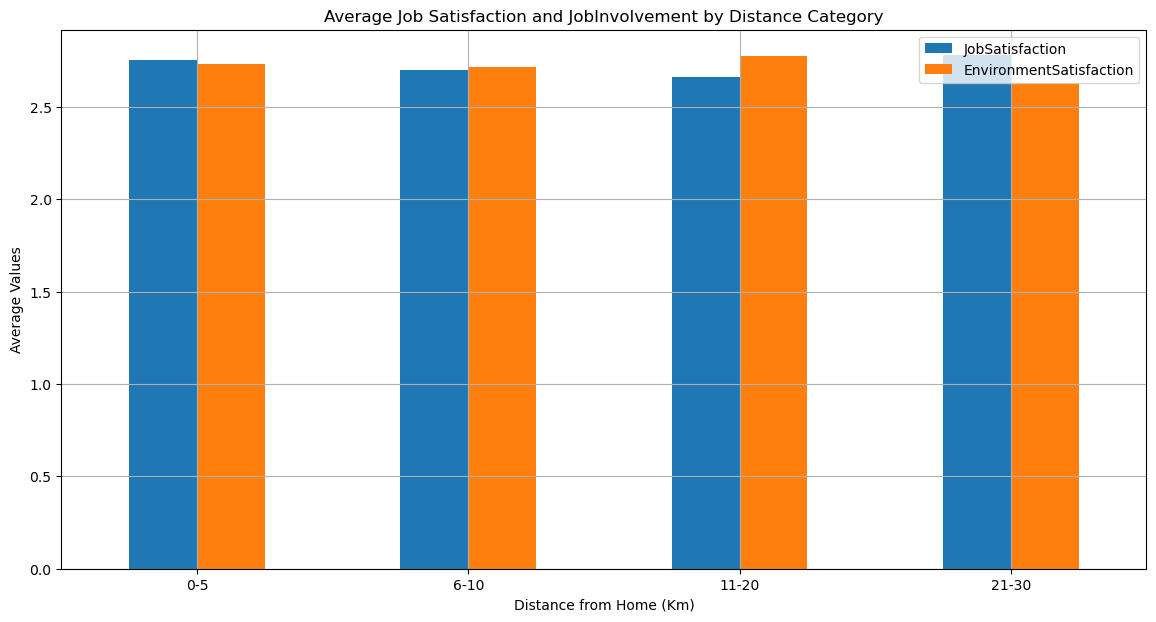

In [53]:
# Create distance categories
df['DistanceCategory'] = pd.cut(df['DistanceFromHome'], bins=[0, 5, 10, 20, 30], labels=['0-5', '6-10', '11-20', '21-30'])

# Average Job Satisfaction and Daily Rate by Distance Category
distance_analysis = df.groupby('DistanceCategory')[['JobSatisfaction', 'EnvironmentSatisfaction']].mean()
distance_analysis.plot(kind='bar', figsize=(14, 7), rot=0)
plt.title('Average Job Satisfaction and JobInvolvement by Distance Category')
plt.xlabel('Distance from Home (Km)')
plt.ylabel('Average Values')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


In [28]:
# Calculate mean satisfaction scores for Job and Environment by distance category
mean_satisfactions = df.groupby('DistanceCategory')[['JobSatisfaction', 'EnvironmentSatisfaction']].mean().reset_index()

# Display the results
display(mean_satisfactions)

,DistanceCategory,JobSatisfaction,EnvironmentSatisfaction
0,0-5,2.754747,2.734177
1,6-10,2.700508,2.715736
2,11-20,2.662500,2.775000
3,21-30,2.779412,2.632353


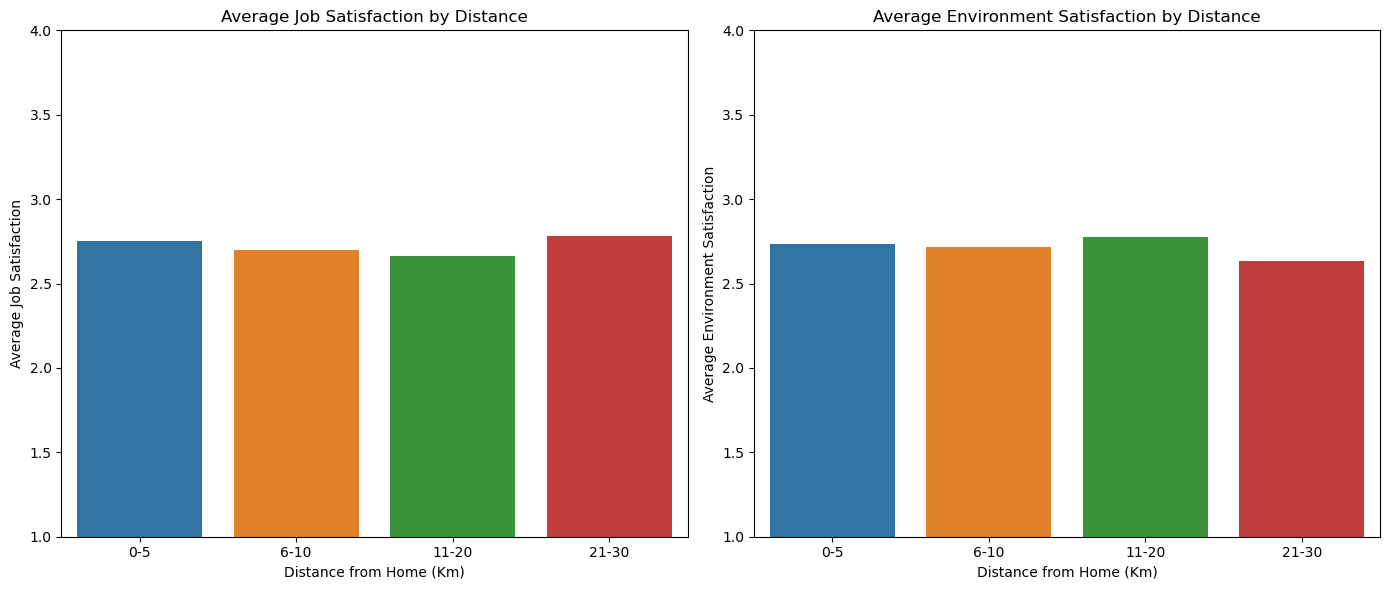

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting area
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Job Satisfaction
sns.barplot(x='DistanceCategory', y='JobSatisfaction', data=mean_satisfactions, ax=axes[0])
axes[0].set_title('Average Job Satisfaction by Distance')
axes[0].set_xlabel('Distance from Home (Km)')
axes[0].set_ylabel('Average Job Satisfaction')
axes[0].set_ylim(1, 4)  # Assuming satisfaction scores are between 1 and 4

# Environment Satisfaction
sns.barplot(x='DistanceCategory', y='EnvironmentSatisfaction', data=mean_satisfactions, ax=axes[1])
axes[1].set_title('Average Environment Satisfaction by Distance')
axes[1].set_xlabel('Distance from Home (Km)')
axes[1].set_ylabel('Average Environment Satisfaction')
axes[1].set_ylim(1, 4)  # Assuming satisfaction scores are between 1 and 4

plt.tight_layout()
plt.show()


# As we can see here, there's a slight decrease in environment satisfaction average among employees who are 21-30 Km far from work. 
oh hold on, can we dive more deeper and see for example the percentage of attrition among these distance categories? let's see

In [58]:
# Convert Attrition to numeric (1 for 'Yes' and 0 for 'No')
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [59]:
# Calculate attrition rate by distance category
attrition_rate_by_distance = df.groupby('DistanceCategory')['Attrition'].mean() * 100  # Convert proportion to percentage

# Display the results
print(attrition_rate_by_distance)


DistanceCategory
0-5      13.765823
6-10     14.467005
11-20    20.000000
21-30    22.058824
Name: Attrition, dtype: float64


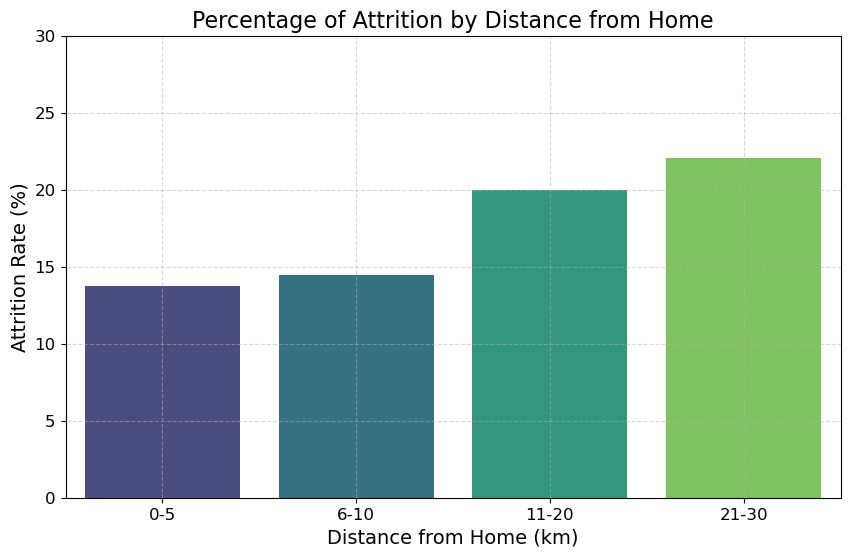

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a color palette
palette = sns.color_palette("viridis", n_colors=len(attrition_rate_by_distance))  # 'viridis' is aesthetically pleasing and print-friendly

# Visualizing the attrition rates by distance category using the selected color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate_by_distance.index, y=attrition_rate_by_distance.values, palette=palette)
plt.title('Percentage of Attrition by Distance from Home', fontsize=16)
plt.xlabel('Distance from Home (km)', fontsize=14)
plt.ylabel('Attrition Rate (%)', fontsize=14)
plt.ylim(0, 30)  # Set the y-axis to show percentages from 0 to 100
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines for better readability
plt.show()


Oh Oh, here's an important finding that Attrition rate increases when the distance from home increase.. this is what I was thinking about and assuming, because the satisfactions above were a survey results which isn't always accurate, maybe some employees just put a random answers in the survey to finish it faster, but 'Data never lies'

# Q2: how changes in job level and the time since the last promotion influence the longevity of employment and attrition rates?

In [65]:
# Display basic statistics and distribution of relevant columns
print(df[['JobLevel', 'YearsSinceLastPromotion', 'YearsAtCompany', 'Attrition']].describe())

# Check the unique values for JobLevel to understand the range
print("Unique Job Levels:", df['JobLevel'].unique())

          JobLevel  YearsSinceLastPromotion  YearsAtCompany    Attrition
count  1470.000000              1470.000000     1470.000000  1470.000000
mean      2.063946                 2.187755        7.008163     0.161224
std       1.106940                 3.222430        6.126525     0.367863
min       1.000000                 0.000000        0.000000     0.000000
25%       1.000000                 0.000000        3.000000     0.000000
50%       2.000000                 1.000000        5.000000     0.000000
75%       3.000000                 3.000000        9.000000     0.000000
max       5.000000                15.000000       40.000000     1.000000
Unique Job Levels: [2 1 3 4 5]


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data
job_level_aggregate = df.groupby('JobLevel').agg(
    Average_Years_At_Company=('YearsAtCompany', 'mean'),
    Attrition_Rate=('Attrition', lambda x: x.mean() * 100)  # converting to percentage
).reset_index()

# Display the aggregated data
print(job_level_aggregate)

   JobLevel  Average_Years_At_Company  Attrition_Rate
0         1                  3.931860       26.335175
1         2                  6.752809        9.737828
2         3                  9.380734       14.678899
3         4                 13.886792        4.716981
4         5                 15.130435        7.246377


We'll use a dual axis chart to show both the average years at the company and attrition rate on the same plot but with different y-axes.

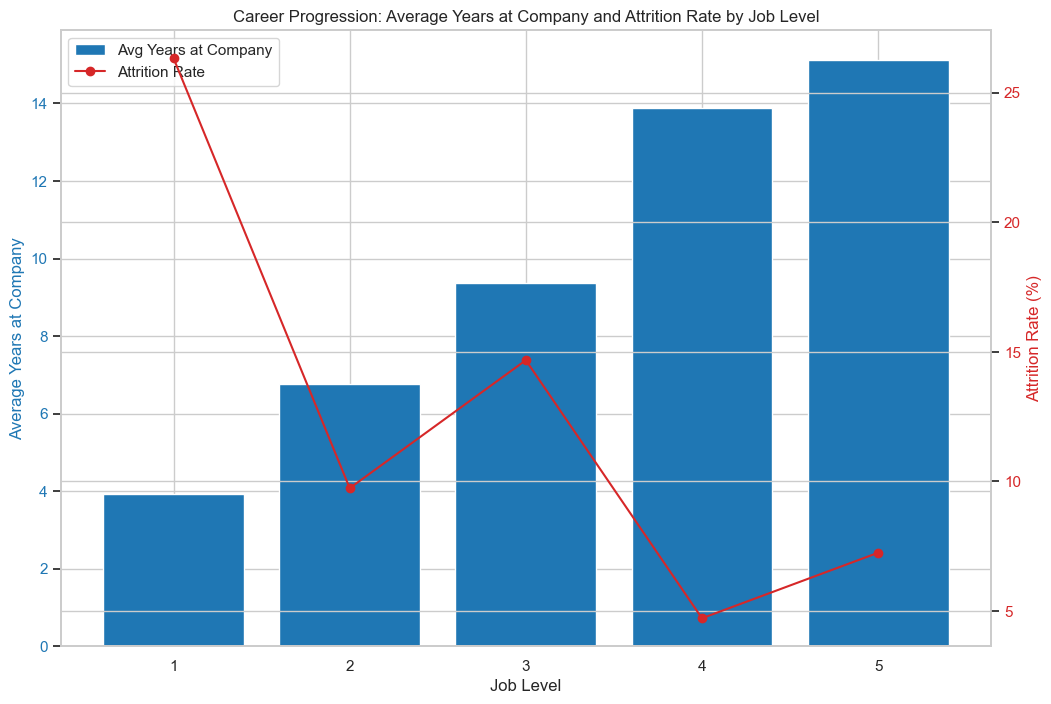

In [88]:
# Setting up the figure
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart for average years at the company
color = 'tab:blue'
ax1.set_xlabel('Job Level')
ax1.set_ylabel('Average Years at Company', color=color)
bar = ax1.bar(job_level_aggregate['JobLevel'], job_level_aggregate['Average_Years_At_Company'], color=color, label='Avg Years at Company')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for attrition rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Attrition Rate (%)', color=color)
line = ax2.plot(job_level_aggregate['JobLevel'], job_level_aggregate['Attrition_Rate'], color=color, label='Attrition Rate', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Adding legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.title('Career Progression: Average Years at Company and Attrition Rate by Job Level')
plt.show()


The data indicates that average years at the company tend to increase as job levels increase. This suggests that employees who advance to higher job levels are likely to stay with the company longer. Such a trend implies a positive relationship between career progression (as indicated by higher job levels) and employee retention.

Recommendations:

The correlation between higher job levels, increased tenure, and reduced attrition underscores the importance of career development programs. Companies might benefit from implementing structured career paths that allow employees to progress through clear and achievable milestones.

Enhancing job satisfaction at lower levels could be key to reducing early-stage attrition. Initiatives could include mentorship programs, involvement in diverse projects, and recognition of achievements to engage and retain talent from the outset.

# Now let's move forward to the last question

# Q3: What are the Key Drivers of Employee Attrition at Our Company?
By building a predictive model for attrition and analyzing feature importance, we can gain insights into which aspects  play the most critical roles in employee turnover.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   int64   
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   object  
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   object  
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

In [91]:
numeric_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
                   'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating',
                   'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion']

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from scipy import stats

# Splitting data into features and target
X = df[numeric_features]
y = df['Attrition']

# Removing outliers using Interquartile Range (IQR)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y = y.loc[X.index]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [99]:
# Scaling data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [100]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define models
models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


Gradient Boosting Model Accuracy: 0.8358
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       167
           1       0.52      0.50      0.51        34

    accuracy                           0.84       201
   macro avg       0.71      0.70      0.70       201
weighted avg       0.83      0.84      0.83       201

Random Forest Model Accuracy: 0.8259
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       167
           1       0.48      0.38      0.43        34

    accuracy                           0.83       201
   macro avg       0.68      0.65      0.66       201
weighted avg       0.81      0.83      0.82       201



C:\Users\nawaf\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Model Accuracy: 0.7761
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       167
           1       0.39      0.56      0.46        34

    accuracy                           0.78       201
   macro avg       0.64      0.69      0.66       201
weighted avg       0.81      0.78      0.79       201

Bagging Model Accuracy: 0.7811
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       167
           1       0.35      0.35      0.35        34

    accuracy                           0.78       201
   macro avg       0.61      0.61      0.61       201
weighted avg       0.78      0.78      0.78       201

Logistic Regression Model Accuracy: 0.6667
              precision    recall  f1-score   support

           0       0.90      0.67      0.77       167
           1       0.29      0.65      0.40        34

    accuracy                           0.67       201
   macro avg       0.5

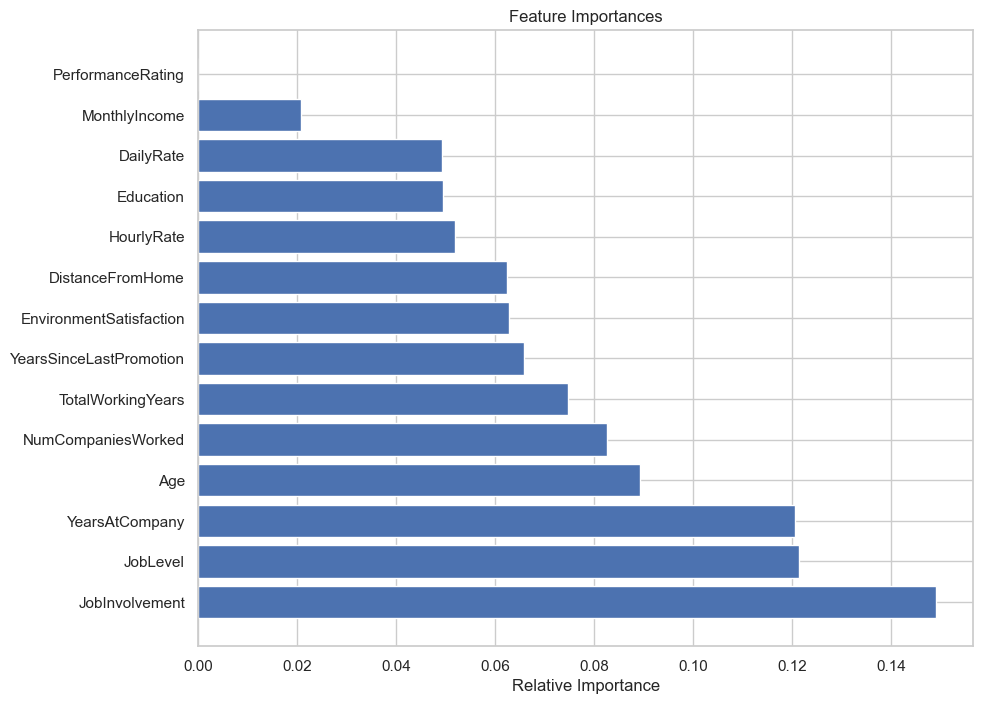

In [101]:
# Assuming Random Forest was the best
best_model = GradientBoostingClassifier(random_state=42)
best_model.fit(X_train_smote, y_train_smote)

# Get feature importances
importances = best_model.feature_importances_
feature_names = X.columns

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
